# **Detección de estados de ánimo a través de sensores**
-----
## **Notebook 1:** Validación de Ground Truth

### Aboulafia Gerardo, Barquet Amélie, Lombardo Micaela, Lopez Verónica, Vazquez Agustina
##### Laboratorio: Consultoría de Datos

# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from exploracion import mean_std_format

# 1 Carga de los datos y exploración inicial

In [2]:
# Cargar datasets correctamente separados por punto y coma
data_PANAS = pd.read_csv('panas.csv', sep=';')
data_SSSQ = pd.read_csv('SSSQ.csv', sep=';')
data_STAI = pd.read_csv('STAI.csv', sep=';')

# Verificamos que ahora sí estén bien
print(data_PANAS.columns)
print(data_SSSQ.columns)
print(data_STAI.columns)


Index(['Participant', 'Condition', 'Active', 'Distressed', 'Interested',
       'Inspired', 'Annoyed', 'Strong', 'Guilty', 'Scared', 'Hostile',
       'Excited', 'Proud', 'Irritable', 'Enthusiastic', 'Ashamed', 'Alert',
       'Nervous', 'Determined', 'Attentive', 'Jittery', 'Afraid', 'Stressed',
       'Frustrated', 'Happy', 'Sad', 'Angry', 'Irritated'],
      dtype='object')
Index(['Participant', 'I was committed to attaining my performance goals',
       'I wanted to succeed on the task', 'I was motivated to do the task',
       'I reflected about myself',
       'I was worried about what other people think of me',
       'I felt concerned about the impression I was making'],
      dtype='object')
Index(['Participant', 'Condition', 'Ease', 'Nervous', 'Jittery', 'Relaxed',
       'Worried', 'Pleasant'],
      dtype='object')


El dataset fue hecho a mano, observamos que hay dos columnas con nombre repetido. Encontramos el error y corregimos el nombre.

In [3]:
# Renombrar columna duplicada correctamente
data_PANAS = data_PANAS.rename(columns={'Nervous.1': 'Determined'})

In [4]:
# Convertir columnas a numérico (excepto 'Participant' y 'Condition')
cols_numericas_panas = data_PANAS.columns.difference(['Participant', 'Condition'])
data_PANAS[cols_numericas_panas] = data_PANAS[cols_numericas_panas].apply(pd.to_numeric, errors='coerce')

cols_numericas_stai = data_STAI.columns.difference(['Participant', 'Condition'])
data_STAI[cols_numericas_stai] = data_STAI[cols_numericas_stai].apply(pd.to_numeric, errors='coerce')

# 2 Análisis por emoción

In [5]:
# Agrupar y calcular media y desviación estándar
agrupadas_PANAS = data_PANAS.groupby('Condition')[cols_numericas_panas].agg(['mean', 'std'])
agrupadas_STAI = data_STAI.groupby('Condition')[cols_numericas_stai].agg(['mean', 'std'])

# Mostrar resultados
print("\nPANAS (Media ± Desvío):\n", agrupadas_PANAS)
print("\nSTAI (Media ± Desvío):\n", agrupadas_STAI)


PANAS (Media ± Desvío):
              Active              Afraid               Alert           Angry  \
               mean       std      mean       std      mean       std  mean   
Condition                                                                     
Amusement  1.666667  0.899735  1.133333  0.351866  3.333333  0.899735   NaN   
Base       1.533333  0.639940  1.200000  0.414039  3.533333  0.743223   NaN   
Medi 1     1.200000  0.414039  1.066667  0.258199  2.200000  0.774597   NaN   
Medi 2     1.600000  0.910259  1.000000  0.000000  2.266667  0.883715   NaN   
TSST       4.000000  0.845154  2.066667  0.961150  4.400000  0.507093   2.6   

                      Annoyed            ...     Proud                 Sad  \
                std      mean       std  ...      mean       std      mean   
Condition                                ...                                 
Amusement       NaN  1.000000  0.000000  ...  1.400000  0.632456  1.000000   
Base            NaN  1.066667

# 3 Análisis por encuesta

## 3.1 PANAS
Positive and Negative Affect Schedule

In [6]:
# Filtrar solo las filas con condición TSST
panas_tsst = data_PANAS[data_PANAS['Condition'] == 'TSST']

# Seleccionar solo las columnas emocionales
emociones = panas_tsst.columns.difference(['Participant', 'Condition'])

# Calcular medias y desvíos
media_tsst = panas_tsst[emociones].mean()
desvio_tsst = panas_tsst[emociones].std()

# Mostrar ordenado por emoción más intensa
media_tsst.sort_values(ascending=False)

Alert           4.400000
Attentive       4.200000
Nervous         4.133333
Active          4.000000
Excited         3.733333
Stressed        3.533333
Determined      3.466667
Interested      3.333333
Jittery         2.666667
Frustrated      2.666667
Scared          2.600000
Angry           2.600000
Strong          2.266667
Distressed      2.133333
Afraid          2.066667
Irritable       2.000000
Enthusiastic    2.000000
Proud           2.000000
Inspired        1.933333
Ashamed         1.933333
Annoyed         1.866667
Happy           1.800000
Sad             1.533333
Hostile         1.333333
Guilty          1.266667
Irritated       1.000000
dtype: float64

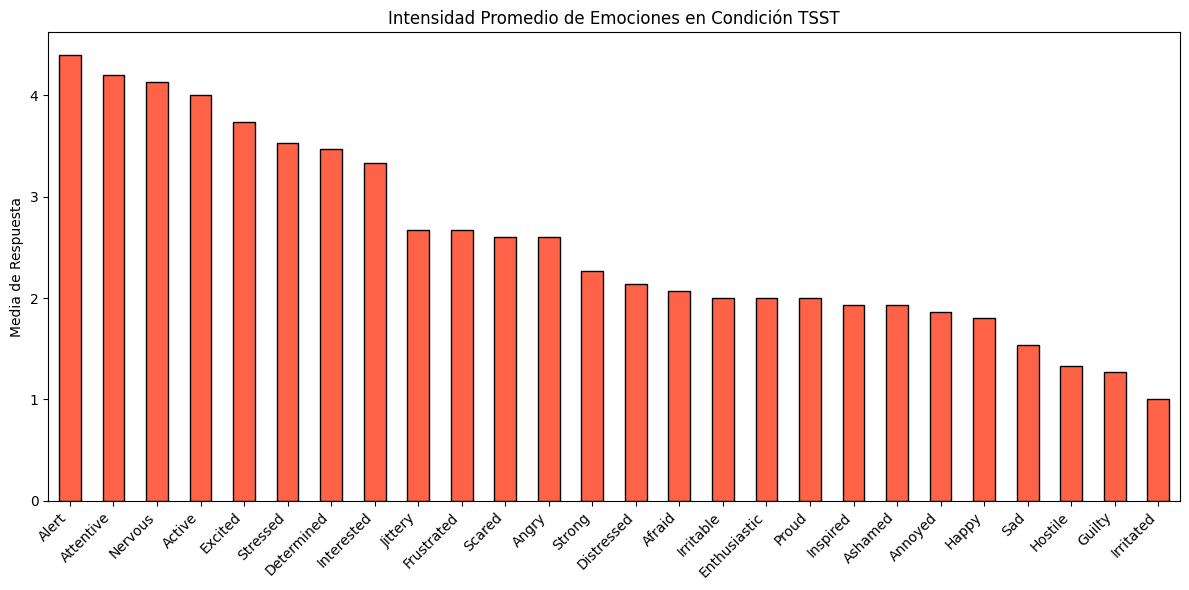

In [7]:
# Ordenar por media descendente
media_ordenada = media_tsst.sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
media_ordenada.plot(kind='bar', color='tomato', edgecolor='black')

# Estética
plt.title('Intensidad Promedio de Emociones en Condición TSST')
plt.ylabel('Media de Respuesta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()

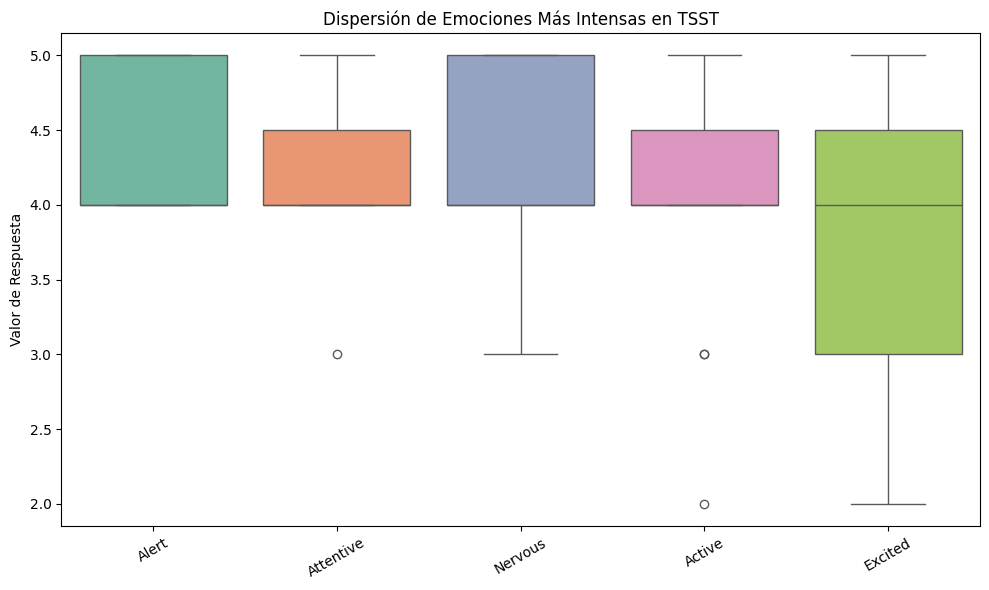

In [8]:
# Seleccionar las 5 emociones más intensas
top5_emociones = media_ordenada.head(5).index

# Crear boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=panas_tsst[top5_emociones], palette='Set2')

# Estética
plt.title('Dispersión de Emociones Más Intensas en TSST')
plt.ylabel('Valor de Respuesta')
plt.xticks(rotation=30)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [9]:
# Ítems PANAS clasificados por valencia (criterio estándar)
positive_items = ['Interested', 'Excited', 'Strong', 'Enthusiastic', 'Proud',
                  'Alert', 'Inspired', 'Attentive', 'Active']
negative_items = ['Distressed', 'Guilty', 'Scared', 'Hostile', 'Irritable',
                  'Ashamed', 'Nervous', 'Nervous.1', 'Jittery', 'Afraid']

# Filtrar columnas que existan realmente en el DataFrame
positive_items = [item for item in positive_items if item in data_PANAS.columns]
negative_items = [item for item in negative_items if item in data_PANAS.columns]

# Agrupar por condición y calcular estadísticas
grouped = data_PANAS.groupby('Condition')

# Calcular resumen
summary = grouped.apply(
    lambda g: pd.Series({
        'PANAS_positive': mean_std_format(g[positive_items].mean(axis=1)),
        'PANAS_negative': mean_std_format(g[negative_items].mean(axis=1))
    })
).reset_index()

print(summary)

   Condition PANAS_positive PANAS_negative
0  Amusement        2.7±0.5        1.2±0.2
1       Base        2.5±0.6        1.2±0.2
2     Medi 1        1.9±0.5        1.1±0.2
3     Medi 2        1.9±0.6        1.2±0.3
4       TSST        3.1±0.5        2.2±0.6


C:\Users\mical\AppData\Local\Temp\ipykernel_11340\3523921124.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = grouped.apply(


## 3.2 SSSQ
Short Stress State Questionnaire

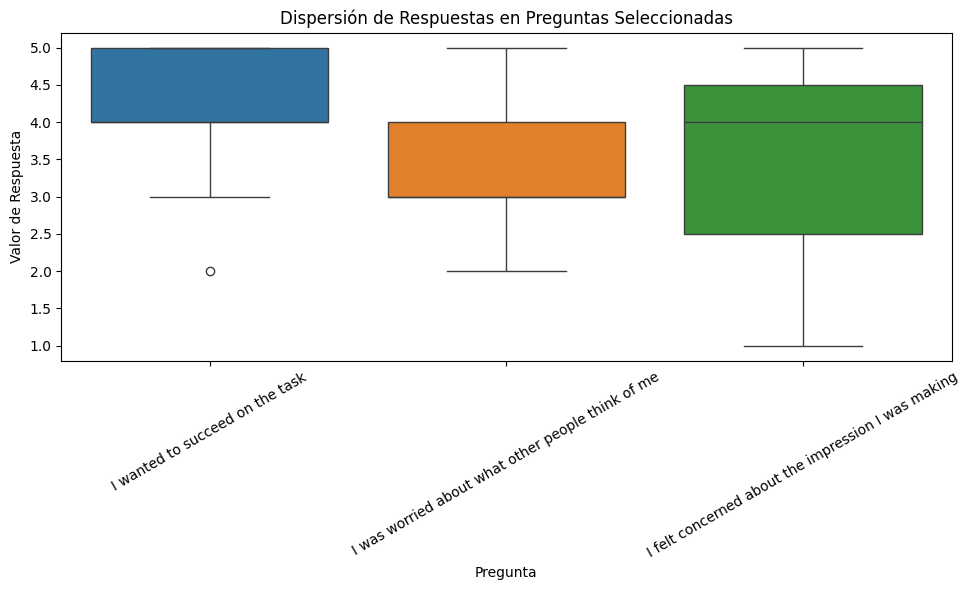

In [10]:
# Selección de columnas específicas
columnas_interes = [
    'I wanted to succeed on the task',
    'I was worried about what other people think of me',
    'I felt concerned about the impression I was making'
]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_SSSQ[columnas_interes])

# Configuración del gráfico
plt.title('Dispersión de Respuestas en Preguntas Seleccionadas')
plt.xlabel('Pregunta')
plt.ylabel('Valor de Respuesta')
plt.xticks(rotation=30)
plt.tight_layout()

# Mostrar gráfico
plt.show()

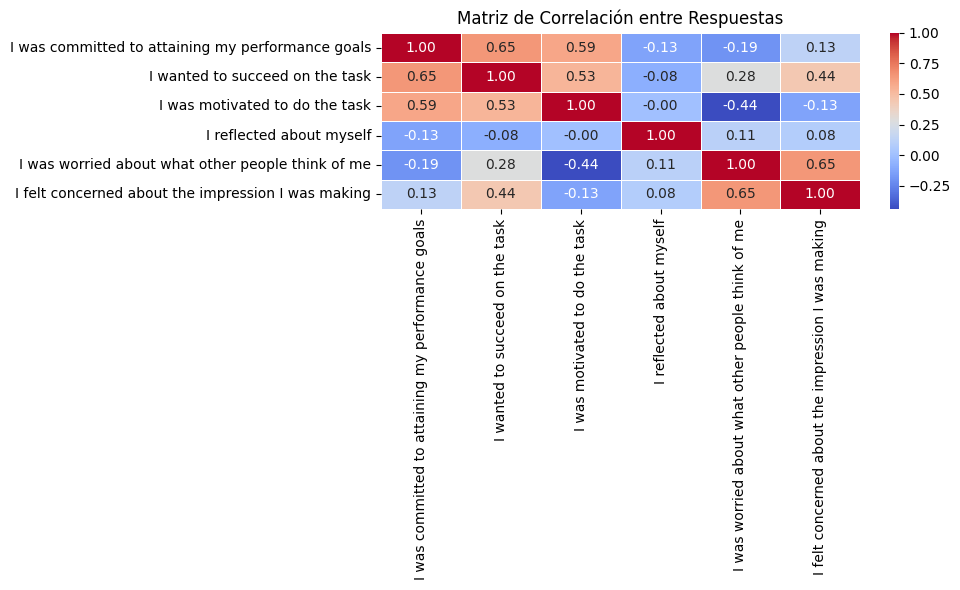

In [11]:
# Calcular la matriz de correlación
correlation_matrix = data_SSSQ.drop(columns=['Participant']).corr()

# Visualizar con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Configuración del gráfico
plt.title('Matriz de Correlación entre Respuestas')
plt.tight_layout()

# Mostrar gráfico
plt.show()

## 3.3 STAI
State Trait Anxiety Inventory


<Figure size 1000x600 with 0 Axes>

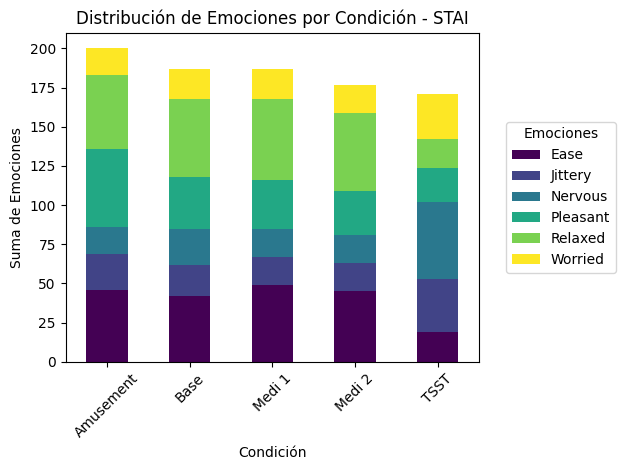

In [12]:
# Agrupar por 'Condition' y seleccionar las emociones para STAI
data_stai_agrupada = data_STAI.groupby('Condition')[cols_numericas_stai].sum()

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
ax = data_stai_agrupada.plot(kind='bar', stacked=True, colormap='viridis')

# Configurar título y etiquetas
plt.title('Distribución de Emociones por Condición - STAI')
plt.xlabel('Condición')
plt.ylabel('Suma de Emociones')
plt.xticks(rotation=45)

# Mover la leyenda al costado
plt.legend(title='Emociones', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Ajustar el layout para evitar que se corte la leyenda
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [13]:
negative_items = ['Nervous', 'Jittery', 'Worried']
positive_items = ['Ease', 'Relaxed', 'Pleasant']

# Filtrar los que existen realmente en el DataFrame
negative_items = [item for item in negative_items if item in data_STAI.columns]
positive_items = [item for item in positive_items if item in data_STAI.columns]

# Agrupar y calcular ambas columnas
summary_stai = data_STAI.groupby('Condition').apply(
    lambda g: pd.Series({
        'STAI_negative': mean_std_format(g[negative_items].mean(axis=1)),
        'STAI_positive': mean_std_format(g[positive_items].mean(axis=1))
    })
).reset_index()

print(summary_stai)

   Condition STAI_negative STAI_positive
0  Amusement       1.3±0.3       3.2±0.6
1       Base       1.4±0.2       2.8±0.6
2     Medi 1       1.2±0.3       2.9±0.7
3     Medi 2       1.2±0.3       2.7±0.8
4       TSST       2.5±0.5       1.3±0.4


C:\Users\mical\AppData\Local\Temp\ipykernel_11340\2120855420.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stai = data_STAI.groupby('Condition').apply(
